# Gráfico de Radar
Gráfico que compara más de dos variables numéricas de un mismo registro o grupo en nuestro dataset al mismo tiempo. Los ejes son radiales. Se traza una línea que va cruzando cada valor numérico de cada variable Eje a Eje a lo largo de un círculo. Su objetivo es comparar las magnitudes de varias variables entre dos o más observaciones o grupos al mismo tiempo.    
**Otros nombres**: Radar Chart, Spider Chart, Gráfico Radial, Gráfico de Araña

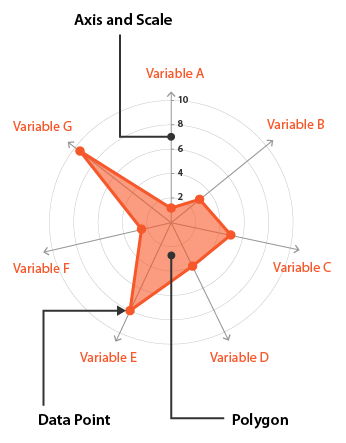

**Ejemplo de Uso**:
- Comparar estadísticas entre jugadores de fútbol

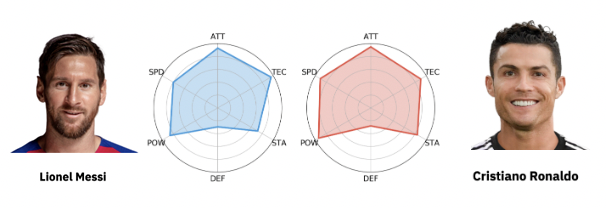


### Cuando utilizar
- Quiero comparar diversas variables numéricas de uno o más grupos de observaciones. También podemos comparar observaciones individuales. 


### Consejos
- Las variables comparadas tienen que (preferiblemente) tener una escala similar. O al menos, compartir la misma unidad de medición. De otro modo, el gráfico será dificil de interpretar.
- Si estoy comparando diversos grupos o observaciones de forma apilada en el mismo gráfico radar, se puede volver ilegible. Una solución sería limitar los grupos, o hacer un Grafico Radar diferente por cada grupo en ves de apilarlos en uno solo.
- De mismo modo, si tengo muchas variables, tambien se puede volver ilegible, ya que tendría demasiados Ejes. También puedo aplicar la misma solución del punto anterior. Es decir, hacer un gráfico radar diferente para comparar otras variables.
- Es un gráfico con usos muy limitados ya que facilmente se vuelve complejo de entender. Y muy dificilmente vamos a tener muchas variables con rangos de valores comparables en un dataset.


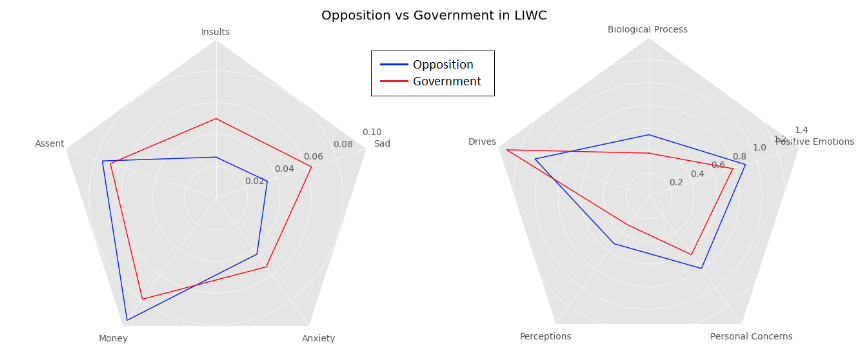


## En esta clase
### Datos
Información sobre especies de pinguinos
### Objetivos
1. Como se comparan las medidas de los pinguinos de diferentes especies

## Referencias
- https://datavizcatalogue.com/ES/metodos/grafico_radial.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('../data/restaurantes.csv')
df

,Nombre,Comida,Variedad,Servicio,Ambiente,Precio
0,Restaurante 1,4,4,5,4,3
1,Restaurante 2,5,5,4,5,2
2,Restaurante 3,3,4,5,3,5


In [3]:
categorias = ['Comida', 'Variedad', 'Servicio', 'Ambiente', 'Precio']

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=df.iloc[0, 1:],
      theta=categorias,
      fill='toself',
      name='Restaurante 1'
))

fig.add_trace(go.Scatterpolar(
      r=df.iloc[1, 1:],
      theta=categorias,
      fill='toself',
      name='Restaurante 2'
))

fig.add_trace(go.Scatterpolar(
      r=df.iloc[2, 1:],
      theta=categorias,
      fill='toself',
      name='Restaurante 2'
))

fig.show()


In [4]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/pinguinos.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
# Eliminamos filas NaNs
df = df.dropna()

In [12]:
# En versiones mas recientes de pandas necesitamos siempre quedarnos solo con las 
# columnas numericas
agrupado = df[[
    'culmen_length_mm', 
    'culmen_depth_mm', 
    'flipper_length_mm',
    'body_mass_g',
    'species'
]].groupby('species').mean()
agrupado

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.542500,15.002500,217.233333,5090.625000


In [13]:
categorias = [
    'culmen_length_mm', 
    'culmen_depth_mm', 
    'flipper_length_mm',
    'body_mass_g'
]
adelie = list(agrupado.iloc[0, :])
chinstrap = list(agrupado.iloc[1, :])
gentoo = list(agrupado.iloc[2, :])
categorias

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [14]:
# Radar Chart con Plotly
# https://plotly.com/python/radar-chart/
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=adelie,
      theta=categorias,
      fill='toself',
      name='Adelie'
))

fig.add_trace(go.Scatterpolar(
      r=chinstrap,
      theta=categorias,
      fill='toself',
      name='Chinstrap'
))

fig.add_trace(go.Scatterpolar(
      r=gentoo,
      theta=categorias,
      fill='toself',
      name='Gentoo'
))

fig.show()

In [15]:
# Podemos intentar NORMALIZAR nuestro dataset...
df2 = df[categorias]
df_norm = (df2-df2.min())/(df2.max()-df2.min())
df_norm['species'] = df['species']
df_norm

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,0.254545,0.666667,0.152542,0.291667,Adelie
1,0.269091,0.511905,0.237288,0.305556,Adelie
2,0.298182,0.583333,0.389831,0.152778,Adelie
4,0.167273,0.738095,0.355932,0.208333,Adelie
5,0.261818,0.892857,0.305085,0.263889,Adelie
...,...,...,...,...,...
338,0.549091,0.071429,0.711864,0.618056,Gentoo
340,0.534545,0.142857,0.728814,0.597222,Gentoo
341,0.665455,0.309524,0.847458,0.847222,Gentoo
342,0.476364,0.202381,0.677966,0.694444,Gentoo


In [16]:
agrupado_norm = df_norm.groupby('species').mean()
agrupado_norm

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,0.244508,0.624674,0.306826,0.279490
Chinstrap,0.608503,0.633403,0.403789,0.286969
Gentoo,0.561545,0.226488,0.766667,0.664062


In [17]:
adelie2 = list(agrupado_norm.loc['Adelie', :])
chinstrap2 = list(agrupado_norm.loc['Chinstrap', :])
gentoo2 = list(agrupado_norm.loc['Gentoo', :])

In [18]:
# Radar Chart con Plotly
# https://plotly.com/python/radar-chart/
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=adelie2,
      theta=categorias,
      fill='toself',
      name='Adelie'
))

fig.add_trace(go.Scatterpolar(
      r=chinstrap2,
      theta=categorias,
      fill='toself',
      name='Chinstrap'
))

fig.add_trace(go.Scatterpolar(
      r=gentoo2,
      theta=categorias,
      fill='toself',
      name='Gentoo'
))

fig.show()